# comparing Gradient descent and Momentum and Nesterov  Momentum using digit- recogniser dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
%cd /content/drive/MyDrive/digit-recognizer

/content/drive/MyDrive/digit-recognizer


In [4]:
df =  pd.read_csv("train.csv")

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.iloc[:,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
X = np.array(df.iloc[: , 1:] / 255)

In [8]:
Y = np.array(df.iloc[: ,0])

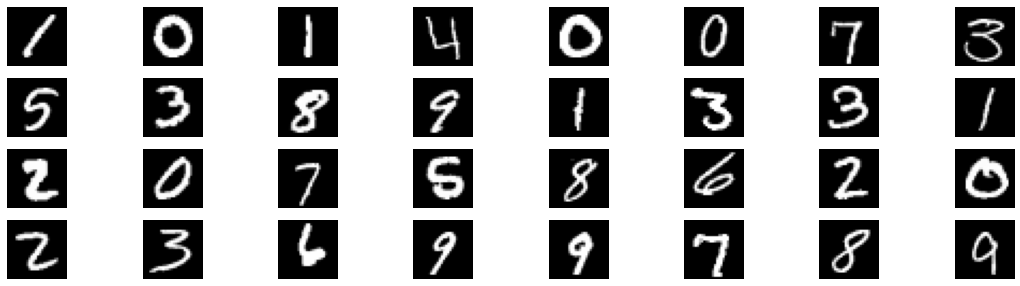

In [9]:
plt.figure(figsize= (19 , 5))
for i in range(32):
    plt.subplot(4 , 8 , i+1)
    plt.imshow(X[i].reshape((28 , 28)), cmap = "gray")
    plt.axis("off")

In [10]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size = 0.2)

# one hot encoding ytrain and ytest for softmax

In [11]:
ytrain_ind = np.array(pd.get_dummies(ytrain))
ytest_ind = np.array(pd.get_dummies(ytest))

# Decode dummies

In [12]:
def decode_dummies(x):
    return np.argmax(x , axis = 1)

# code for ANN

## Activation functions

In [13]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def relu(x):
    return (x * (x > 0))

def softmax(x):
    expA = np.exp(x)
    return (expA / expA.sum(axis = 1 , keepdims = True))

## Forward propagation

In [14]:
def forward(x , W1 , W2 ,b1 ,b2):
    z = relu((x.dot(W1) + b1))
    # z = sigmoid((x.dot(W1) + b1)) #sigmoid
    # z = np.tanh((x.dot(W1) + b1)) #tanh
    return z , softmax(z.dot(W2) + b2)

## Derivative of loss function with respect to W2 , b2 , W1 , b1

In [15]:
def derivative_W2(true_t , y , z):
    return (z.T.dot(y - true_t))

def derivative_b2(true_t , y):
    return ((y - true_t).sum(axis = 0))
    

In [16]:
def derivative_W1(true_t , y , z , x , W2):
    # dz = ((y - true_t).dot(W2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(b2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * (z > 0))  # relu
    return x.T.dot(dz)

def derivative_b1(true_t , y , z , b2):
    # dz = ((y - true_t).dot(b2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(b2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * (z > 0)) # relu
    return dz.sum(axis = 0)


## classification metrics

In [17]:
def cross_entropy(true_t , y):
    return -(np.sum(true_t*np.log(y)))

def accuracy(true_t , y):
    return np.mean(true_t == y)

## Initialize weight and hyper parameters that is common for all

In [18]:
N , D  =  xtrain.shape
M = 300
K = 10
W1_0 = np.random.randn(D , M) / np.sqrt(D + M)
b1_0 = np.random.randn(M) / np.sqrt(M)
W2_0 = np.random.randn(M ,K) / np.sqrt(M + K)
b2_0 = np.random.randn(K) / np.sqrt(K)

batch_sz = 500
n_batches = int(N / batch_sz)

lr = 0.00004
reg = 0.01

epochs = 150

## 1.Batch gradient descent (relu in hidden)

In [19]:
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

costs_0 = []
acc_0 = []

In [20]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)

        # gradient descent 

        W2 -= lr * (derivative_W2(ybatch , y , z) + reg * W2)
        b2 -= lr * (derivative_b2(ybatch , y ) + reg * b2)
        W1 -= lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        b1 -= lr * (derivative_b1(ybatch , y , z , W2) + reg * b1)

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_0.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_0.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 160.37070441049542 -- accuracy - 0.07462686567164178
i = 0 -- j = 20 -- cost - 156.8124450243938 -- accuracy - 0.14925373134328357
i = 0 -- j = 40 -- cost - 152.48759630903788 -- accuracy - 0.11940298507462686
i = 0 -- j = 60 -- cost - 151.24271276987974 -- accuracy - 0.13432835820895522
i = 1 -- j = 0 -- cost - 151.95599433053022 -- accuracy - 0.11940298507462686
i = 1 -- j = 20 -- cost - 148.22042115249036 -- accuracy - 0.23880597014925373
i = 1 -- j = 40 -- cost - 145.44610691396724 -- accuracy - 0.19402985074626866
i = 1 -- j = 60 -- cost - 144.19026075355487 -- accuracy - 0.208955223880597
i = 2 -- j = 0 -- cost - 145.0348314659996 -- accuracy - 0.26865671641791045
i = 2 -- j = 20 -- cost - 140.65779493748187 -- accuracy - 0.31343283582089554
i = 2 -- j = 40 -- cost - 139.19394848725636 -- accuracy - 0.40298507462686567
i = 2 -- j = 60 -- cost - 137.61321991822888 -- accuracy - 0.44776119402985076
i = 3 -- j = 0 -- cost - 138.67734305119308 -- accuracy - 0

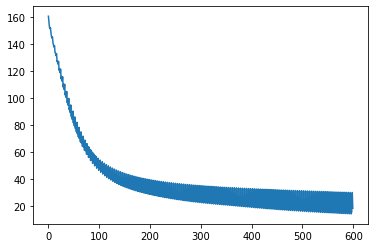

In [21]:
plt.plot(costs_0)

# 2.Momentum
## This can be achieved by adding a velocity parameter and updating them at each iteration

## W = W + dw
## dw = mu * dw - (lr * (derivative_W + reg * W))

## Note : if we assign mu = 0 then it would be normal batch gradient desccent

In [22]:
# using same initial weights
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

mu = 0.9
dW2 = 0
dW1 = 0
db2 = 0
db1 = 0

costs_1 = []
acc_1 = []

In [23]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)

        # gradient descent with momentum
 

        dW2 = mu * dW2 - lr * (derivative_W2(ybatch , y , z) + reg * W2)
        W2 += dW2

        db2 = mu * db2 - lr * (derivative_b2(ybatch , y ) + reg * b2)
        b2 += db2

        dW1 = mu * dW1 - lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        W1 += dW1 

        db1 = mu * db1 - lr * (derivative_b1(ybatch , y , z , W2) + reg * b1)
        b1 += db1
         

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_1.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_1.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 160.37070441049542 -- accuracy - 0.07462686567164178
i = 0 -- j = 20 -- cost - 143.14374057800342 -- accuracy - 0.26865671641791045
i = 0 -- j = 40 -- cost - 128.3095405069971 -- accuracy - 0.6268656716417911
i = 0 -- j = 60 -- cost - 110.25884489324275 -- accuracy - 0.7910447761194029
i = 1 -- j = 0 -- cost - 108.55450329851358 -- accuracy - 0.6417910447761194
i = 1 -- j = 20 -- cost - 85.81481109743802 -- accuracy - 0.7761194029850746
i = 1 -- j = 40 -- cost - 79.02091791292122 -- accuracy - 0.746268656716418
i = 1 -- j = 60 -- cost - 63.43381063038783 -- accuracy - 0.8805970149253731
i = 2 -- j = 0 -- cost - 67.93338941086988 -- accuracy - 0.835820895522388
i = 2 -- j = 20 -- cost - 53.322098038260236 -- accuracy - 0.8507462686567164
i = 2 -- j = 40 -- cost - 55.80318291296352 -- accuracy - 0.7910447761194029
i = 2 -- j = 60 -- cost - 43.212827569045245 -- accuracy - 0.8805970149253731
i = 3 -- j = 0 -- cost - 48.26905913762171 -- accuracy - 0.89552238805970

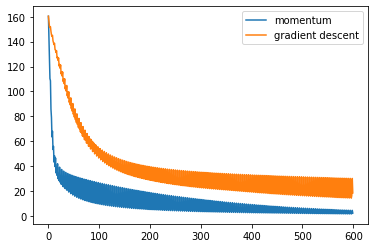

In [24]:
plt.plot(costs_1 , label = "momentum")
plt.plot(costs_0 , label = "gradient descent")
plt.legend()

# 3.Nesterov momentum

## gW = lr * (derivative_W + reg * W)
## dw = mu * dw - gW
## W  = W + mu*dw - gW

## Note : if we assign mu = 0 then it would be normal batch gradient desccent

In [25]:
# using same initial weights
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

mu = 0.9
dW2 = 0
dW1 = 0
db2 = 0
db1 = 0

costs_2 = []
acc_2 = []

In [26]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)


        # gradient descent with Nesterov momentum
 
        gW2 = lr * (derivative_W2(ybatch , y , z) + reg * W2)
        dW2 = mu * dW2 - gW2
        W2 += mu * dW2 - gW2
        
        gb2 = lr * (derivative_b2(ybatch , y ) + reg * b2)
        db2 = mu * db2 - gb2
        b2 += mu * db2 - gb2
         
        gW1 = lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        dW1 = mu * dW1 - gW1
        W1 += mu * dW1 - gW1 
        
        gb1 = lr * (derivative_b1(ybatch , y , z , W2) + reg * b1)
        db1 = mu * db1 - gb1
        b1 += mu * db1 - gb1
         

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_2.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_2.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 160.17455516988593 -- accuracy - 0.07462686567164178
i = 0 -- j = 20 -- cost - 142.14998008675485 -- accuracy - 0.29850746268656714
i = 0 -- j = 40 -- cost - 127.32032600445176 -- accuracy - 0.6417910447761194
i = 0 -- j = 60 -- cost - 109.03546648093224 -- accuracy - 0.7910447761194029
i = 1 -- j = 0 -- cost - 107.45107134765817 -- accuracy - 0.6716417910447762
i = 1 -- j = 20 -- cost - 84.78114261765066 -- accuracy - 0.7761194029850746
i = 1 -- j = 40 -- cost - 78.20842332929026 -- accuracy - 0.746268656716418
i = 1 -- j = 60 -- cost - 62.71704853463545 -- accuracy - 0.8805970149253731
i = 2 -- j = 0 -- cost - 67.32292128841951 -- accuracy - 0.835820895522388
i = 2 -- j = 20 -- cost - 52.912852428342205 -- accuracy - 0.8507462686567164
i = 2 -- j = 40 -- cost - 55.402051997714636 -- accuracy - 0.7910447761194029
i = 2 -- j = 60 -- cost - 42.90207420117405 -- accuracy - 0.8805970149253731
i = 3 -- j = 0 -- cost - 48.01859325868462 -- accuracy - 0.8955223880597

# plotting costs

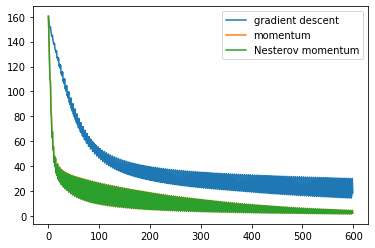

In [27]:
plt.plot(costs_0 , label = "gradient descent")
plt.plot(costs_1 , label = "momentum")
plt.plot(costs_2 , label = "Nesterov momentum")
plt.legend()

# plotting Accuracy

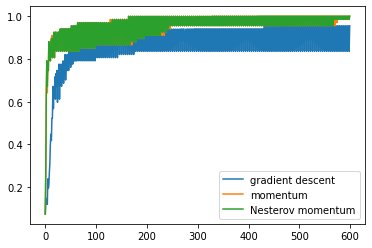

In [28]:
plt.plot(acc_0 , label = "gradient descent")
plt.plot(acc_1 , label = "momentum")
plt.plot(acc_2 , label = "Nesterov momentum")
plt.legend()

# conclusion :

## Using momentum decreases cost faster than normal gradient descent
## Using Normal momentum and nesterov momentum is almost the same